## Training

In [1]:
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense, Input, Add, merge, concatenate
from keras.layers.convolutional import Conv3D
from keras.layers.pooling import MaxPooling3D, GlobalAveragePooling3D, AveragePooling3D
from keras import metrics
from keras import optimizers
from keras.utils import plot_model
from keras import backend as K
from keras.utils.training_utils import multi_gpu_model
from keras.utils.data_utils import Sequence
from keras.callbacks import ModelCheckpoint
from keras.initializers import he_uniform
from keras.initializers import glorot_uniform

import numpy as np
import sys
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("models/")
sys.path.append("scripts/")

/usr/local/anaconda3/envs/deeplearning/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="4, 5, 6, 7"

In [3]:
from my_classes import DataGenerator, AugmentedDataGenerator

In [4]:
# Load the data
h5f = h5py.File('data/data_distributed2.h5', 'r')
train_x, train_y = h5f['train_x'][:], h5f['train_y'][:]
valid_x, valid_y = h5f['valid_x'][:], h5f['valid_y'][:]
test_x, test_y = h5f['test_x'][:], h5f['test_y'][:]
h5f.close()

print(train_x.shape, valid_x.shape, test_x.shape)

(3012, 24, 24, 24, 16) (377, 24, 24, 24, 16) (376, 24, 24, 24, 16)


In [5]:
from models import Squeeze_model

In [6]:
# from IPython.display import SVG
# from keras.utils.vis_utils import plot_model, model_to_dot
# model_input = Input(shape=(24, 24, 24, 16))
# squeeze_model = Model(inputs=model_input, outputs=Squeeze_model(model_input))
# #plot_model(squeeze_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# SVG(model_to_dot(squeeze_model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))
# # plot_model(get_model4((24, 24, 24, 16)))

In [7]:
# Training parameters
nb_gpus = 4
nb_batch = nb_gpus*4
nb_epochs = 100
l_rate = 1e-4

In [8]:
# checkpoint
outputFolder = './weights'
# if not os.path.exists(outputFolder):
#     os.makedirs(outputFolder)

filepath=outputFolder+"/weights-distributed_rotated_90.h5"

callbacks_list = [ModelCheckpoint(filepath, 
                                  monitor='val_loss',
                                  verbose=1,
                                  save_best_only=True,
                                  save_weights_only=True,
                                  mode='auto', period=1)]

In [9]:
model_input = Input(shape=(24, 24, 24, 16))
squeeze_model = Model(inputs=model_input, outputs=Squeeze_model(model_input))
model = multi_gpu_model(squeeze_model, gpus=nb_gpus)

model.compile(optimizer=optimizers.adam(lr=l_rate),# beta_1=0.99, beta_2=0.999),
              loss='mean_absolute_error')

In [10]:
aug_data_gen = AugmentedDataGenerator(x=train_x, y=train_y, batch_size=nb_batch)
aug_val_gen = AugmentedDataGenerator(x=valid_x, y=valid_y, batch_size=nb_batch)

In [11]:
for x, y in aug_data_gen:
    print(x.shape, y.shape)
    break

(384, 24, 24, 24, 16) (384,)


In [13]:
history = model.fit_generator(generator=aug_data_gen, validation_data=aug_val_gen,
                              use_multiprocessing=False, 
                              epochs=nb_epochs, 
                              max_queue_size=5, 
                              workers=56, 
                              verbose=1, callbacks = callbacks_list)

Epoch 1/100
188/188 [==============================] - 137s 726ms/step - loss: 2.1448 - val_loss: 1.6145

Epoch 00001: val_loss improved from inf to 1.61446, saving model to ./weights/weights-distributed_rotated_90.h5
Epoch 2/100
188/188 [==============================] - 135s 717ms/step - loss: 1.6900 - val_loss: 1.5300

Epoch 00002: val_loss improved from 1.61446 to 1.52996, saving model to ./weights/weights-distributed_rotated_90.h5
Epoch 3/100
188/188 [==============================] - 128s 683ms/step - loss: 1.6538 - val_loss: 1.4249

Epoch 00003: val_loss improved from 1.52996 to 1.42492, saving model to ./weights/weights-distributed_rotated_90.h5
Epoch 4/100
188/188 [==============================] - 132s 700ms/step - loss: 1.5582 - val_loss: 1.7223

Epoch 00004: val_loss did not improve
Epoch 5/100
188/188 [==============================] - 130s 693ms/step - loss: 1.5514 - val_loss: 1.5567

Epoch 00005: val_loss did not improve
Epoch 6/100
188/188 [=============================

188/188 [==============================] - 216s 1s/step - loss: 0.6626 - val_loss: 1.3691

Epoch 00053: val_loss did not improve
Epoch 54/100
188/188 [==============================] - 309s 2s/step - loss: 0.6378 - val_loss: 1.4838

Epoch 00054: val_loss did not improve
Epoch 55/100
188/188 [==============================] - 198s 1s/step - loss: 0.6343 - val_loss: 1.4642

Epoch 00055: val_loss did not improve
Epoch 56/100
188/188 [==============================] - 297s 2s/step - loss: 0.6107 - val_loss: 1.4871

Epoch 00056: val_loss did not improve
Epoch 57/100
188/188 [==============================] - 256s 1s/step - loss: 0.5874 - val_loss: 1.4787

Epoch 00057: val_loss did not improve
Epoch 58/100
188/188 [==============================] - 244s 1s/step - loss: 0.5928 - val_loss: 1.5691

Epoch 00058: val_loss did not improve
Epoch 59/100
188/188 [==============================] - 282s 1s/step - loss: 0.5761 - val_loss: 1.4944

Epoch 00059: val_loss did not improve
Epoch 60/100
188/18

In [18]:
# Save the history
import pickle

with open(os.path.join(outputFolder, "history_distributed_rotated-90.pickle"), 'wb') as f:
    pickle.dump(history.history, f)

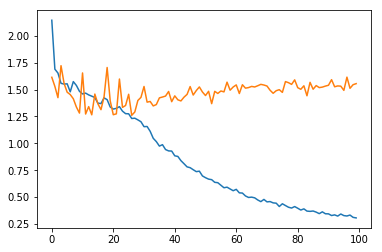

In [14]:
# First 100 epochs
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [15]:
from sklearn.metrics import r2_score

In [16]:
model.load_weights(filepath)

In [17]:
sample_size = 200
rotation_count = 24 # Because it's 90 degree rotation

train_aug_data_gen = AugmentedDataGenerator(x=train_x,
                                            y=train_y,
                                            batch_size=sample_size)
# Two chunks to avoid memory issues
test_aug_data_gen= AugmentedDataGenerator(x=test_x[:sample_size],
                                            y=test_y[:sample_size],
                                            batch_size=sample_size)

# Train r2

for x, y in train_aug_data_gen:
    # Without average
    train_r2 = r2_score(y_true=y, y_pred=model.predict(x))
    print("Train r2 (without average): ", train_r2)
    
    # With average
    y_pred = model.predict(x)[:, 0]
    
    sample_y = np.zeros(sample_size)
    sample_ypred = np.zeros(sample_size)
    for i in range(sample_size):
        start = i*rotation_count
        end = i*rotation_count + rotation_count
        mean_ypred = np.mean(y_pred[start:end])
        mean_y = np.mean(y[start:end])
        sample_ypred[i] = mean_ypred
        sample_y[i] = mean_y
    
    train_r2 = r2_score(y_true=sample_y, y_pred=sample_ypred)
    print("Train r2 (with average): ", train_r2)
    break
    
#sample_size = test_x.shape[0]
    
# Test r2

for x, y in test_aug_data_gen:
    # Without average
    test_r2 = r2_score(y_true=y, y_pred=model.predict(x))
    print("Test r2 (without average): ", test_r2)
    
    # With average
    y_pred = model.predict(x)[:, 0]
    
    sample_y = np.zeros(sample_size)
    sample_ypred = np.zeros(sample_size)
    for i in range(sample_size):
        start = i*rotation_count
        end = i*rotation_count + rotation_count
        mean_ypred = np.mean(y_pred[start:end])
        mean_y = np.mean(y[start:end])
        sample_ypred[i] = mean_ypred
        sample_y[i] = mean_y
    
    test_r2 = r2_score(y_true=sample_y, y_pred=sample_ypred)
    print("Test r2 (with average): ", test_r2)
    break

Train r2 (without average):  0.4044429632970251
Train r2 (with average):  0.4555838570815747
Test r2 (without average):  0.3497966032527091
Test r2 (with average):  0.40481611752360336
